In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [44]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [45]:
# infer a,m parameter
prm_keys = [:a, :m]

# observation time window fixed
t_fixed = true

true

In [46]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.4827638037419715, 0.3960053218605668], plot_mles = Plot{Plots.GRBackend() n=12}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 -0.032895948394739756; -0.03289594839473972 1.0], cov = [0.00102569001098558 -0.00013982978133701804; -0.0001398297813370179 0.017615639242631775], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [47]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed, n0=n0_true, w0=w0)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

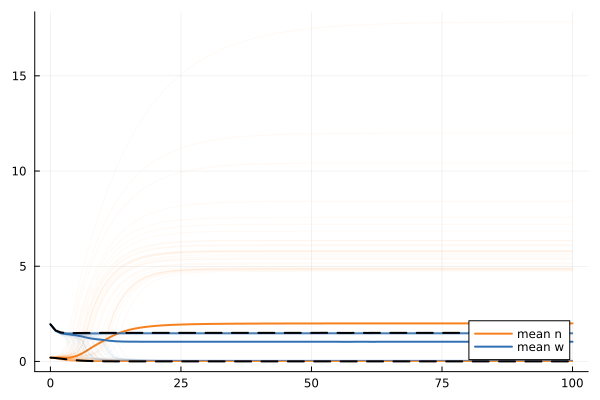

In [48]:
rf.trajectories